In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

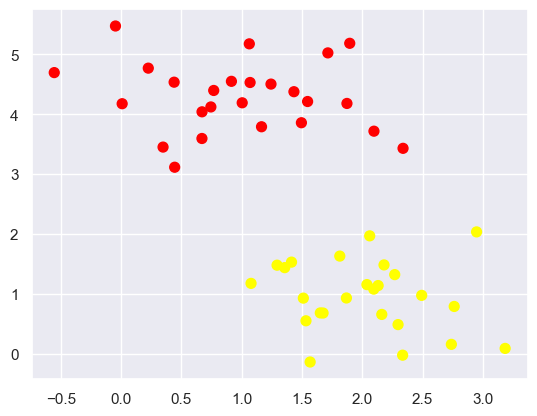

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

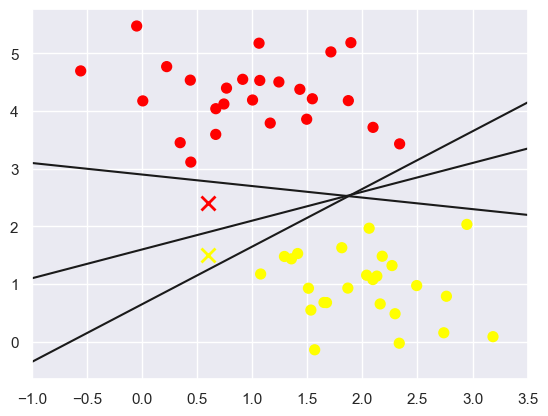

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.4], 'x', color='red', markeredgewidth=2, markersize=10)
plt.plot([0.6], [1.5], 'x', color='yellow', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

In [4]:
"""Converting classes marked as 0 to -1"""
class PerceptronClassifier:

    def __init__(self, learning_rate , iterations) -> None:
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.W = None
        self.b = None
    
    def updateClassEncoding(self , acutal_y):
        for i in range(len(acutal_y)):
            if acutal_y[i] == 0:
                acutal_y[i] = -1
        return acutal_y
    
    def perceptron_loss(self , X , y):
        y_pred =  np.dot(X , self.W) + self.b
        total_loss = 0
        for i in range(len(y)):
            loss = max(0,-y[i] * y_pred[i])
            total_loss += loss
        return total_loss

    def fit(self, X , y ):

        self.W , self.b = self.initialize_weight(X.shape[1] , "zero")
        for iterator in range(1 ,self.iterations + 1):            
            
            for i in range(X.shape[0]):
                y_pred = np.sign(np.dot(X ,self.W) + self.b)
                if (y[i] * y_pred[i]) <= 0:
                    self.W += self.learning_rate * y[i] * X[i]
                    self.b += self.learning_rate * y[i]
            
            if iterator % 1 == 0:
                print(f"Percetron Loss for iteration {iterator} : {self.perceptron_loss(X,y)}")
                print(f"Weights after iteration {iterator} : W = {self.W}  b = {self.b}")

        return self.W , self.b
        
    
    def initialize_weight(self , n , type):
        if type == "zero":
            return np.zeros(n) , 0
        if type == "random":
            return np.random.rand(n) , 0
        
    def predict(self , X):
        return np.sign(np.dot(X , self.W) + self.b)

In [5]:
y

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

In [6]:
classifier = PerceptronClassifier(0.001 , 10)
y_actual = classifier.updateClassEncoding(y)
classifier.fit(X , y_actual)

Percetron Loss for iteration 1 : 0
Weights after iteration 1 : W = [ 0.0020751  -0.00176731]  b = 0.001
Percetron Loss for iteration 2 : 0
Weights after iteration 2 : W = [ 0.0020751  -0.00176731]  b = 0.001
Percetron Loss for iteration 3 : 0
Weights after iteration 3 : W = [ 0.0020751  -0.00176731]  b = 0.001
Percetron Loss for iteration 4 : 0
Weights after iteration 4 : W = [ 0.0020751  -0.00176731]  b = 0.001
Percetron Loss for iteration 5 : 0
Weights after iteration 5 : W = [ 0.0020751  -0.00176731]  b = 0.001
Percetron Loss for iteration 6 : 0
Weights after iteration 6 : W = [ 0.0020751  -0.00176731]  b = 0.001
Percetron Loss for iteration 7 : 0
Weights after iteration 7 : W = [ 0.0020751  -0.00176731]  b = 0.001
Percetron Loss for iteration 8 : 0
Weights after iteration 8 : W = [ 0.0020751  -0.00176731]  b = 0.001
Percetron Loss for iteration 9 : 0
Weights after iteration 9 : W = [ 0.0020751  -0.00176731]  b = 0.001
Percetron Loss for iteration 10 : 0
Weights after iteration 10 :

(array([ 0.0020751 , -0.00176731]), 0.001)

<p>The algorithm converges to the the minima after the first interation. 
If we check the weights after the first iteration weights are not getting updated , means it has found the minima
after the first itereation and that leads to conclusion perceptron loss is zero just after the single
iteration.
</p>

In [7]:
y_ = classifier.predict(X)
accuracy = np.mean(y_ == y_actual)
print(f"Accuracy : {accuracy}")

Accuracy : 1.0


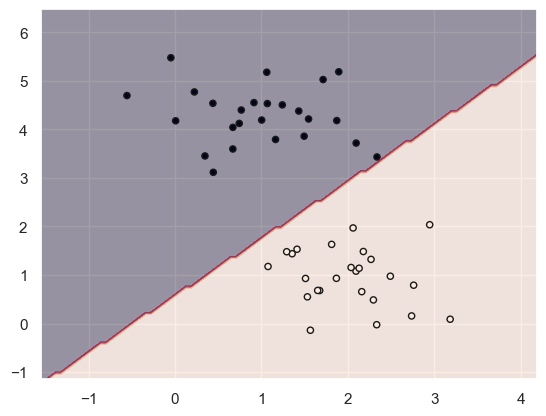

In [8]:
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100),
                     np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.show()

### SVM Classifier 

In [25]:
class SVMClassifier:

    def __init__(self , learning_rate , iterations ,lambda_param ) -> None:
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.lambda_param = lambda_param
        self.W = None
        self.b = None

    def fit(self, X , y):

        self.W , self.b = self.initialize_weight(X.shape[1] , "zero")

        for iterator in range(1 ,self.iterations+1):
            for idx , x_i in enumerate(X):
                """minimize min||w|| given y(wx +b)>=1"""
                condition = y[idx] * (np.dot(x_i , self.W) - self.b) >=1
                if condition:
                    self.W -= self.learning_rate *(2 * self.lambda_param * self.W)
                else:
                    self.W -= self.learning_rate * (2 * self.lambda_param * self.W - np.dot(x_i , y[idx]))
                    self.b -= self.learning_rate * y[idx]
            if iterator%100 == 0:
                print(f"Iteration {iterator} , Loss : {self.loss(X,y)}")

    def loss(self , X , y):
        hinge_loss = np.maximum(0 , 1 - y * (np.dot(X , self.W)-self.b)).sum()
        return hinge_loss
 
    def initialize_weight(self , n , type):
        if type == "zero":
            return np.zeros(n) , 0
        if type == "random":
            return np.random.rand(n) , 0 
    
    def predict(self, X):
        return np.sign(np.dot(X , self.W) - self.b)

In [26]:
classifierSVM = SVMClassifier(0.001 , 10000 , 0.01)
classifierSVM.fit(X , y_actual)

Iteration 100 , Loss : 3.6832617931613854
Iteration 200 , Loss : 2.545223471758069
Iteration 300 , Loss : 2.0609559367756467
Iteration 400 , Loss : 1.5854336289553341
Iteration 500 , Loss : 1.150191735827485
Iteration 600 , Loss : 0.824113589116199
Iteration 700 , Loss : 0.6235577194050446
Iteration 800 , Loss : 0.5487573956431447
Iteration 900 , Loss : 0.518051718951674
Iteration 1000 , Loss : 0.5227877675070473
Iteration 1100 , Loss : 0.5346775956337719
Iteration 1200 , Loss : 0.5448653257607606
Iteration 1300 , Loss : 0.554121099399717
Iteration 1400 , Loss : 0.5576681500409659
Iteration 1500 , Loss : 0.563298208447577
Iteration 1600 , Loss : 0.564378253991545
Iteration 1700 , Loss : 0.5652304234708039
Iteration 1800 , Loss : 0.5642715490410375
Iteration 1900 , Loss : 0.5624722239989377
Iteration 2000 , Loss : 0.5470018623801349
Iteration 2100 , Loss : 0.5390178107533681
Iteration 2200 , Loss : 0.5304587743119415
Iteration 2300 , Loss : 0.5218518891851007
Iteration 2400 , Loss : 0.5

In [27]:
y_predicted_svm = classifierSVM.predict(X)
accuracy_svm = np.mean(y_predicted_svm == y_actual)
print("Accuracy : " , accuracy_svm)

Accuracy :  1.0


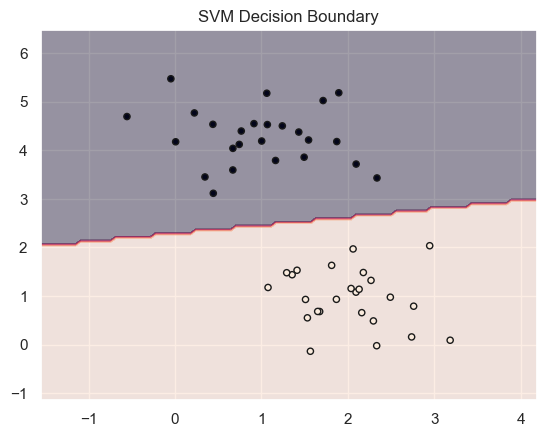

In [29]:
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100),
                     np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100))
Z = classifierSVM.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y_actual, s=20, edgecolor='k')
plt.title("SVM Decision Boundary")
plt.show()